# Introduction to Python for Digital Text Analysis (Part I)

This session will provide an overview of how Python can be used to descriptively summarise a dataset made of YouTube comments.

We expect you to have basic knowledge of Python, bue if you don't, here's the link:
https://github.com/fbkarsdorp/python-intro/blob/master/notebook.ipynb

As this lesson is aimed at people with little python experience - perhaps nothing more than one tutorial! - we are first going to refresh your memory of some Python tools.

_____________________________

Just before that, I'll tell you one of the most important things I've learned about programming:

### Most problems you'll ever face [in Python] were once someone else's problem.

So Google it. Go to Stack Overflow. Don't spend time trying to reinvent the wheel.

## Refreshing your python memory

__Strings__ are one of Python's simplest data types. A string can be represented with single ( **'** ) or double ( **"** ) quotation marks:

In [2]:
s = "Hello world!"
print(s)

Hello world!


A string can be modified in many ways. Here we will focus in a few of them.

You can replace part of a string:

In [3]:
s2 = s.replace("world", "python")
print(s2)

Hello python!


You can concatenate strings, by summing one string to another:

In [4]:
s3 = s + ' ' + s2
print(s3)

Hello world! Hello python!


You can split strings, turning them into lists:

In [5]:
splitstring = s3.split()
print (splitstring)

['Hello', 'world!', 'Hello', 'python!']


**Lists** are sequences of objects. For instance, the object _splitstring_ above is a list of strings.

Here's how to define an empty list, and fill it with numbers, in various ways. Note that one way to fill a list is to add another list to it:

In [6]:
my_list = []

my_list.append(10)
my_list.append(20)

my_list = my_list + [ 30 ]

my_list += range(4)
# this is the same as: my_list = my_list + range(4)

print( my_list )
print( my_list[:2] )
print( my_list[4:] )
print( my_list[:2]+my_list[4:] )

[10, 20, 30, 0, 1, 2, 3]
[10, 20]
[1, 2, 3]
[10, 20, 1, 2, 3]


If lists are ordered sequences of objects, **Dictionaries** are for when there's no necessary order.

The elements of a dictionary are pairs of **keys** and **values**.

Here's how to create a dictionary and populate it with key-value pairs:

In [7]:
my_dict = {}

my_dict['location'] = 'Brussels'
my_dict['host'] = 'EASt'
my_dict['event'] = 'workshop'

print my_dict
print my_dict.keys()
print my_dict.values()

{'host': 'EASt', 'location': 'Brussels', 'event': 'workshop'}
['host', 'location', 'event']
['EASt', 'Brussels', 'workshop']


Once you have your strings, lists, dictionaries and whatever else, you might want to go through them.

**for loops** are one common way to iterate over structures. Here's how to iterate over a range of integers:

In [8]:
for i in range(5):
    print(i)

0
1
2
3
4


But you can iterate over any kind of list. For example, here's how to iterate over a list of strings:

In [9]:
names  = [ 'Amelie','Tom','Niko','Ruben','Esma' ]

for name in names:
    print ("My name is "+name)

My name is Amelie
My name is Tom
My name is Niko
My name is Ruben
My name is Esma


And here's how to iterate over two lists at the same time, using **zip**:

In [10]:
names  = [ 'Amelie','Tom','Niko','Ruben','Esma' ]
births = [ 1968, 1984, 1977, 1988, 1973 ]
 
for i, j in zip(names, births):
    print( i, "was born in", j )

('Amelie', 'was born in', 1968)
('Tom', 'was born in', 1984)
('Niko', 'was born in', 1977)
('Ruben', 'was born in', 1988)
('Esma', 'was born in', 1973)


_____________

# Data analysis with *pandas*

In [11]:
import pandas as pd

Now that we have fresh python in our heads, we can look into the YouTube comments. We will be using the **pandas** library, which is very common in data analysis tasks.

Here, **comments** will be a **DataFrame** object. You can think of this object as a spreadsheet.

We will be analysing comments from one video by the K-pop band EXO. You can repeat this analysis with any other video in the dataset.

Now let's load the dataset:

In [12]:
comments = pd.read_csv('data/kpop_videos_metadata/exo/I3dezFzsNss.txt', delimiter='\t')

Show the first rows of **comments**:

In [13]:
comments.head()

,Search,Title,VideoID,CommentID,CommentPublished,CommentUpdated,CommentTextDisplay,CommentAuthorName,CommentAuthorURI,CommentCanReply,CommentTotalReplyCount,CommentisPublic,CommentLikeCount,CommentVewerRating,IsReply,CommentPosterInfo
0,https://www.youtube.com/channel/UCEf_Bc-KVd7on...,EXO_으르렁 (Growl)_Music Video (Korean ver.),I3dezFzsNss,z22xh5jg4k2qihsxa04t1aokg4s1z3dasi1t0x00bl0rbk...,2017-08-02T12:30:41.000Z,2017-08-02T12:30:41.000Z,hi love your group😍😍,Naomi Nicole Yambao,http://www.youtube.com/channel/UCgKNWcyzGUki05...,false,0.0,True,0.0,none,0.0,NaN
1,https://www.youtube.com/channel/UCEf_Bc-KVd7on...,EXO_으르렁 (Growl)_Music Video (Korean ver.),I3dezFzsNss,z23uexlogtr2tlpuxacdp430horwegylmjduvkgwwydw03...,2017-08-02T12:22:35.000Z,2017-08-02T12:22:35.000Z,I reply love exo.,Ahmad Farhan Zarin,http://www.youtube.com/channel/UCPgG5K1vZ11Ml-...,false,0.0,True,0.0,none,0.0,NaN
2,https://www.youtube.com/channel/UCEf_Bc-KVd7on...,EXO_으르렁 (Growl)_Music Video (Korean ver.),I3dezFzsNss,z230ibrzhyyqvbb5k04t1aokgimmqowmdk3y52tvq1mlbk...,2017-08-02T10:03:26.000Z,2017-08-02T10:03:26.000Z,I love exo gussssssss 💜💜💜💜💜💜💜💜💜💜,sheridan tulio,http://www.youtube.com/channel/UCBEz6cQfyxMC9G...,false,0.0,True,0.0,none,0.0,NaN
3,https://www.youtube.com/channel/UCEf_Bc-KVd7on...,EXO_으르렁 (Growl)_Music Video (Korean ver.),I3dezFzsNss,z224etfowwr2wvzwm04t1aokgljq3oegusu4ltzmc5mdbk...,2017-08-02T09:13:33.000Z,2017-08-02T09:13:33.000Z,pause the video at exactly 1:10 and you nothic...,Seraph Gaming,http://www.youtube.com/channel/UCfa8YIK7eVm_9g...,false,0.0,True,0.0,none,0.0,NaN
4,https://www.youtube.com/channel/UCEf_Bc-KVd7on...,EXO_으르렁 (Growl)_Music Video (Korean ver.),I3dezFzsNss,z22vw5fylsv2sxzaq04t1aokg4nt21krutepbqls05zrbk...,2017-08-01T23:04:24.000Z,2017-08-01T23:04:24.000Z,I have watched this way too many times for my ...,Ashleigh Sharman,http://www.youtube.com/channel/UCCisZVYC0gOOmn...,false,0.0,True,0.0,none,0.0,NaN


**Filter** the dataframe, to select only part of the comments:

In [14]:
comments = comments.filter(items=['CommentPublished','CommentTextDisplay','CommentAuthorName','CommentLikeCount'])

comments.head()

,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount
0,2017-08-02T12:30:41.000Z,hi love your group😍😍,Naomi Nicole Yambao,0.0
1,2017-08-02T12:22:35.000Z,I reply love exo.,Ahmad Farhan Zarin,0.0
2,2017-08-02T10:03:26.000Z,I love exo gussssssss 💜💜💜💜💜💜💜💜💜💜,sheridan tulio,0.0
3,2017-08-02T09:13:33.000Z,pause the video at exactly 1:10 and you nothic...,Seraph Gaming,0.0
4,2017-08-01T23:04:24.000Z,I have watched this way too many times for my ...,Ashleigh Sharman,0.0


Filters can be combined. The result is always another dataframe:

In [15]:
one_two_likes = comments[ (comments['CommentLikeCount'] >= 1) & (comments['CommentLikeCount'] <= 2) ]

one_two_likes.head()

,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount
5,2017-08-01T16:33:42.000Z,watching this video in 2017. i hope kokobop ge...,Ria Torres,2.0
7,2017-08-01T11:39:31.000Z,3:01 though😂😂 chanyeol still memorize when he ...,FOUR Friends,2.0
9,2017-08-01T10:56:39.000Z,Still love that save by kai at 2:16 xdd,Johan Pagdanganan,2.0
13,2017-08-01T06:47:11.000Z,august 2017 and im still here watching this ㅋㅋㅋ,Prisca Cynthia Limardi,2.0
16,2017-07-31T21:41:59.000Z,Didn't anyone notice the silhouette on D.O.'s ...,Leila Moreno,1.0


Another way to use filters is to create token columns with _True_ for the rows that pass these filters and _False_ for the rows that do not. Here we define a new column called _SomeLikes_, which is _True_ for rows with _CommentLikeCount_ >= 1 and <= 2. 

In [16]:
comments['SomeLikes'] = (comments['CommentLikeCount'] >= 1) & (comments['CommentLikeCount'] <= 2)

comments.head()

,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount,SomeLikes
0,2017-08-02T12:30:41.000Z,hi love your group😍😍,Naomi Nicole Yambao,0.0,False
1,2017-08-02T12:22:35.000Z,I reply love exo.,Ahmad Farhan Zarin,0.0,False
2,2017-08-02T10:03:26.000Z,I love exo gussssssss 💜💜💜💜💜💜💜💜💜💜,sheridan tulio,0.0,False
3,2017-08-02T09:13:33.000Z,pause the video at exactly 1:10 and you nothic...,Seraph Gaming,0.0,False
4,2017-08-01T23:04:24.000Z,I have watched this way too many times for my ...,Ashleigh Sharman,0.0,False


Columns can be removed with **del**:

In [17]:
del comments['SomeLikes']

comments.head()

,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount
0,2017-08-02T12:30:41.000Z,hi love your group😍😍,Naomi Nicole Yambao,0.0
1,2017-08-02T12:22:35.000Z,I reply love exo.,Ahmad Farhan Zarin,0.0
2,2017-08-02T10:03:26.000Z,I love exo gussssssss 💜💜💜💜💜💜💜💜💜💜,sheridan tulio,0.0
3,2017-08-02T09:13:33.000Z,pause the video at exactly 1:10 and you nothic...,Seraph Gaming,0.0
4,2017-08-01T23:04:24.000Z,I have watched this way too many times for my ...,Ashleigh Sharman,0.0


There is more than one way to access a column and its values.

In the code below, both _comments.head()['CommentTextDisplay']_ and _comments.head().CommentTextDisplay_ show the text of the first 5 comments, with their indices on the side, while _comments.head().CommentTextDisplay.values_ does not show the indices.

Note how any emoji or special characters disappear with the third option as well.

In [18]:
print( comments.head()['CommentTextDisplay'] )

print ("\n---------------------------------------------------------\n")

print( comments.head().CommentTextDisplay )

print ("\n---------------------------------------------------------\n")

print( comments.head().CommentTextDisplay.values )

0                                 hi love your group😍😍
1                                    I reply love exo.
2                    I love exo  gussssssss 💜💜💜💜💜💜💜💜💜💜
3    pause the video at exactly 1:10 and you nothic...
4    I have watched this way too many times for my ...
Name: CommentTextDisplay, dtype: object

---------------------------------------------------------

0                                 hi love your group😍😍
1                                    I reply love exo.
2                    I love exo  gussssssss 💜💜💜💜💜💜💜💜💜💜
3    pause the video at exactly 1:10 and you nothic...
4    I have watched this way too many times for my ...
Name: CommentTextDisplay, dtype: object

---------------------------------------------------------

['hi love your group\xf0\x9f\x98\x8d\xf0\x9f\x98\x8d' 'I reply love exo.'
 'I love exo  gussssssss \xf0\x9f\x92\x9c\xf0\x9f\x92\x9c\xf0\x9f\x92\x9c\xf0\x9f\x92\x9c\xf0\x9f\x92\x9c\xf0\x9f\x92\x9c\xf0\x9f\x92\x9c\xf0\x9f\x92\x9c\xf0\x9f\x92\x9c\xf0\x9

Here is how to print one specific row of the dataframe:

In [19]:
print (comments.loc[19])

CommentPublished                               2017-07-31T13:41:53.000Z
CommentTextDisplay    Did anyone else notice kai drop his hat at 2:1...
CommentAuthorName                                           Magic Touch
CommentLikeCount                                                      2
Name: 19, dtype: object


And here is how to print one specific field from that row:

In [20]:
print (comments.loc[19].CommentTextDisplay)

Did anyone else notice kai drop his hat at 2:14 😂😂❤❤


### Exercise 1:

Pick another YouTube video, by one of the four bands, load the file and find the most liked comment. You will need the function **max()**, which returns the maximum value of a list (of numbers, normally).

_____________

# Basic statistics and data visualisation

Now it is time to visualise some of the statistics of this dataset. But first, we need to process this data a little bit.

If we look again at our dataframe **comments**, we can see that each comment has a unique date and time, indicated in **CommentPublished**:

In [21]:
comments.head()

,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount
0,2017-08-02T12:30:41.000Z,hi love your group😍😍,Naomi Nicole Yambao,0.0
1,2017-08-02T12:22:35.000Z,I reply love exo.,Ahmad Farhan Zarin,0.0
2,2017-08-02T10:03:26.000Z,I love exo gussssssss 💜💜💜💜💜💜💜💜💜💜,sheridan tulio,0.0
3,2017-08-02T09:13:33.000Z,pause the video at exactly 1:10 and you nothic...,Seraph Gaming,0.0
4,2017-08-01T23:04:24.000Z,I have watched this way too many times for my ...,Ashleigh Sharman,0.0


We can change that by using the datetime library to turn that string into year, month, day, hour, minute and second.

Note how _comments['CommentDateTime']_ is written: this combination of _apply_ and _lambda_ is another way to define a column of your dataframe as a function of other columns.

In [22]:
from datetime import datetime
from dateutil import parser

comments['CommentDateTime'] = comments.apply( lambda row: parser.parse(row.CommentPublished), axis=1 )  

print( "min CommentDateTime =", comments.CommentDateTime.min() )
print( "max CommentDateTime =", comments.CommentDateTime.max() )

('min CommentDateTime =', Timestamp('2013-08-01 00:31:48+0000', tz='UTC'))
('max CommentDateTime =', Timestamp('2017-08-02 14:00:39+0000', tz='UTC'))


Let's also add the column *hour*, indicating the time of the day when each comment was posted.

In [23]:
comments['hour'] = comments.apply( lambda row: row.CommentDateTime.hour, axis=1 )  

comments.head()

,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount,CommentDateTime,hour
0,2017-08-02T12:30:41.000Z,hi love your group😍😍,Naomi Nicole Yambao,0.0,2017-08-02 12:30:41+00:00,12
1,2017-08-02T12:22:35.000Z,I reply love exo.,Ahmad Farhan Zarin,0.0,2017-08-02 12:22:35+00:00,12
2,2017-08-02T10:03:26.000Z,I love exo gussssssss 💜💜💜💜💜💜💜💜💜💜,sheridan tulio,0.0,2017-08-02 10:03:26+00:00,10
3,2017-08-02T09:13:33.000Z,pause the video at exactly 1:10 and you nothic...,Seraph Gaming,0.0,2017-08-02 09:13:33+00:00,9
4,2017-08-01T23:04:24.000Z,I have watched this way too many times for my ...,Ashleigh Sharman,0.0,2017-08-01 23:04:24+00:00,23


Finally, let's also remove any rows containing null (_NaN_) results.

In [24]:
comments = comments.dropna()

_____________
### Visualising comments over time

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set(color_codes=True)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

/home/chico/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


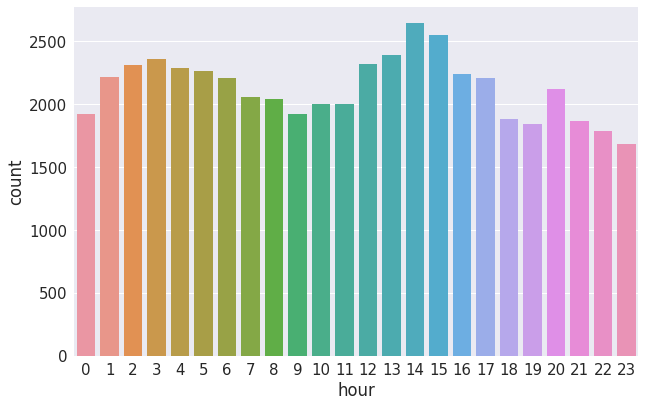

In [26]:
g = sns.factorplot(x="hour", data=comments, kind="count", size=6, aspect=1.5)
plt.show()

### Visualising number of likes per comment

In [62]:
print( "The mean number of likes per comment is "+str(comments.CommentLikeCount.mean()) ) 

The mean number of likes per comment is 2.57123025184


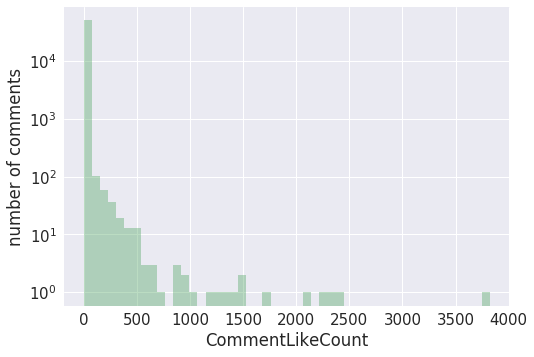

In [28]:
g = sns.distplot( comments.CommentLikeCount , kde=False, rug=False, color='g' )

g = g.set_ylabel('number of comments')

plt.yscale('log')
plt.show()

We can look in more detail at the comments with the most likes.

In [29]:
for index, row in comments[ comments.CommentLikeCount > 2000 ].iterrows():
    print str(row.CommentLikeCount) + " likes: " + row.CommentTextDisplay + "\n"

2415.0 likes: Who's watching this in 2017?

2286.0 likes: The day came today where I finally learnt all of their names  And honestly it feels like one of the greatest accomplishments of my life lmao

2108.0 likes: *aggressively stares at my bias*

3821.0 likes: I still remember the day I first watched this mv. I was so overwhelmed and taken aback. It's been a wild ride and I'm still here. Love Exo, love anyone who continues to support ot9.

2330.0 likes: 2012- i found you.  2013- i fell in love with you.  2014- i missed you.  2015- i trusted you  2016- i still  support you.



We can look at the number of unique authors:

In [30]:
all_authors = set(comments.CommentAuthorName)
print ("Number of unique authors: " + str(len(all_authors)) )

Number of unique authors: 27119


### Number of comments per author and number of likes per author:

We can also look at which authors comment more or get more likes. Here I have made two dictionaries, *comment_count* and *likes_count*, which have author names as keys, and number of comments and number of likes as values, respectively. 

In [31]:
comment_count = {}
likes_count   = {}

for index, row in comments.iterrows():
    
    author = row.CommentAuthorName
    number_of_likes = int(row.CommentLikeCount)
    
    if author in comment_count:
        comment_count[author] += 1
    else:
        comment_count[author]  = 1
        
    if author in likes_count:
        likes_count[author] += number_of_likes
    else:
        likes_count[author]  = number_of_likes

all_authors = comment_count.keys()

data_dict = { 'Author':list(all_authors),
              'CommentCount':comment_count.values(),
              'TotalLikes':likes_count.values() }

authors = pd.DataFrame(data_dict)

authors.head()

,Author,CommentCount,TotalLikes
0,raizerain,23,0
1,creepcyeol 엑소,1,1
2,Kookie Monster,1,6
3,afefah1,2,0
4,V - RALDO,1,0


You can sort the dataframe __authors__ by comment count:

In [32]:
authors.sort_values('CommentCount', ascending=False).head(10)

,Author,CommentCount,TotalLikes
12509,Deedee Saku,814,70
22701,exo anna,606,184
4010,"When a unicorn farted, Lay existed",587,306
4218,kpop Fan,435,285
1294,exo ikon,376,448
11521,miza hamid,274,40
23125,Karen Tang,243,188
3006,SK Angel,240,358
7304,LoneWolf,227,3
949,kamjong in,168,0


You can sort the dataframe __authors__ by like count:

In [33]:
authors = authors.sort_values('TotalLikes', ascending=False)
authors.head(10)

,Author,CommentCount,TotalLikes
23764,realistic dreamr,2,3824
17017,Kai,2,2415
2305,claire oh,1,2330
25172,vin dm,1,2286
262,Alix Malone,6,2113
19777,soomyeonxing saves lives sweaties,1,1743
1339,Kim Jong Kai,105,1633
3876,j r,1,1524
22472,E᙭O 安妮,1,1459
21487,Bubbllee POP,1,1439


Log-log plot of the number of likes per author:

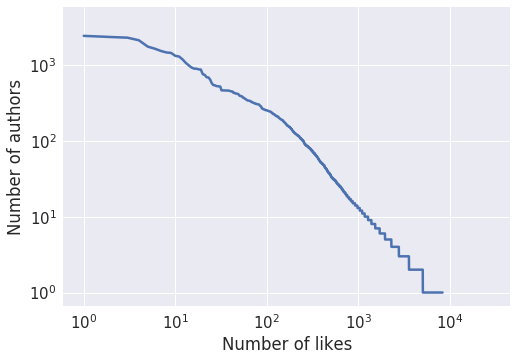

In [37]:
x = sorted(authors.TotalLikes.values)[::-1]

plt.loglog(x, color='b')
plt.ylabel('Number of authors')
plt.xlabel('Number of likes')
plt.show()

Log-log plot of the number of comments per author:

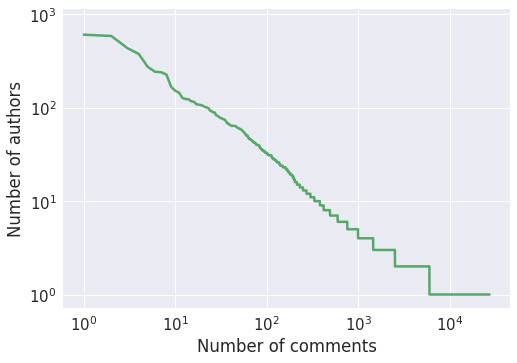

In [38]:
x = sorted(authors.CommentCount.values)[::-1]
plt.loglog(x, color='g')
plt.ylabel('Number of authors')
plt.xlabel('Number of comments')
plt.show()

Scatter plot of comments per author vs likes per author:

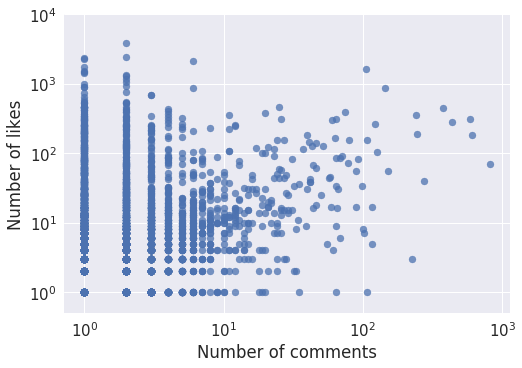

In [63]:
#plt.close("all")
plt.scatter( authors.CommentCount, authors.TotalLikes, alpha=0.75 )
plt.xscale('log')
plt.yscale('log')

plt.ylabel('Number of likes')
plt.xlabel('Number of comments')

plt.ylim(0.5,10000)
plt.show()

### Exercise 2:

With the same video from the previous exercise, see if you can make the same plots we made here:
- A bar plot for the number of comments per hour
- A bar plot for the number of likes per comment
- A line plot for the number of likes per author
- A line plot for the number of comments per author

_____________

### Comment counts for each video for each of the four groups

In [40]:
# Blackpink comment counts.
df_blackpink_counts = pd.read_csv("data/kpop_comment_counts/blackpink_comment_counts.txt", sep="\t")

# BTS comment counts.
df_bts_counts = pd.read_csv("data/kpop_comment_counts/bts_comment_counts.txt", sep="\t")

# EXO comment counts.
df_exo_counts = pd.read_csv("data/kpop_comment_counts/exo_comment_counts.txt", sep="\t")

# Twice comment counts.
df_twice_counts = pd.read_csv("data/kpop_comment_counts/twice_comment_counts.txt", sep="\t")

In [41]:
df_blackpink_counts.head()

,VideoID,Comments
0,hKUJmA9O6iA,7317
1,Amq-qlqbjYA,50184
2,9pdj4iJD08s,41426
3,FzVR_fymZw4,23461
4,NvWfJTbrTBY,9376


In [42]:
all_bands  = [ df_blackpink_counts, df_bts_counts, df_exo_counts, df_twice_counts ]
band_names = [ 'Black Pink', 'BTS', 'EXO', 'TWICE' ]

for df,name in zip(all_bands, band_names):
    df['BandName'] = [name]*len(df)    

In [43]:
df_blackpink_counts.head()

,VideoID,Comments,BandName
0,hKUJmA9O6iA,7317,Black Pink
1,Amq-qlqbjYA,50184,Black Pink
2,9pdj4iJD08s,41426,Black Pink
3,FzVR_fymZw4,23461,Black Pink
4,NvWfJTbrTBY,9376,Black Pink


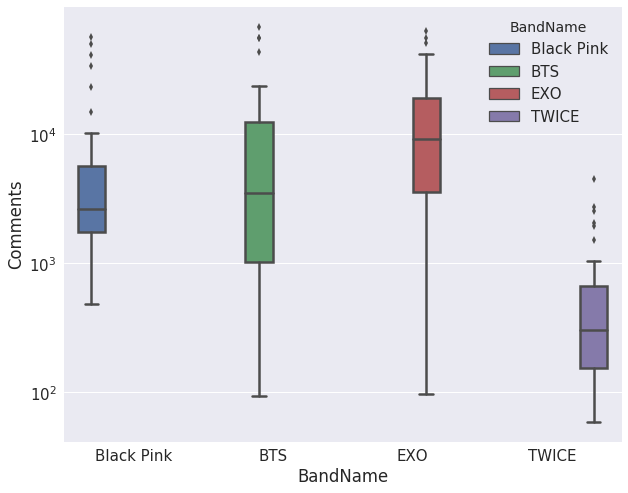

In [58]:
df_allbands = pd.concat(all_bands)

plt.subplots(figsize=(10,8))
g = sns.boxplot(x="BandName", y="Comments", hue="BandName", data=df_allbands)
g.set( yscale='log' )

plt.show()